In [211]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time 

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [212]:
# loading data

df = pd.read_csv('./time-series/zillow_data.csv')
df.head(20)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [213]:
shape = df.shape
print("Ther shape of the data is:",shape)

Ther shape of the data is: (14723, 272)


In [214]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [215]:
# Checking for duplicates and missing data in the dataset
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

cleaning(df)

"There are '157934' missing values and '0' duplicated values in the dataset"

In [216]:
def summarize_data_types(df):
    """
    Create a summary DataFrame showing data types, unique value counts, and sample counts for each feature.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame for which to summarize data types and statistics.
    
    Returns:
    - pd.DataFrame: Summary DataFrame with columns for Feature, Dtypes, and Sample_Unique.
    """
    data_types = []
    for col in df.columns:
        data_types.append({
            'Feature': col,
            'Dtypes': df[col].dtype,
            'Sample_Unique': df[col].nunique()
        })
    
    summary_df = pd.DataFrame(data_types)
    return summary_df

# Get summary of data types and unique values
summary_df = summarize_data_types(df)
print(summary_df)


        Feature  Dtypes  Sample_Unique
0      RegionID   int64          14723
1    RegionName   int64          14723
2          City  object           7554
3         State  object             51
4         Metro  object            701
..          ...     ...            ...
267     2017-12   int64           5248
268     2018-01   int64           5276
269     2018-02   int64           5303
270     2018-03   int64           5332
271     2018-04   int64           5310

[272 rows x 3 columns]


In [217]:
def missing_values_percentage(df):
    # Calculating the total number of missing values in the DataFrame
    total_missing = df.isnull().sum().sum()

    # Checking the total number of cells in the DataFrame
    total_cells = df.size

    # Calculating the percentage of missing values
    percentage_missing = (total_missing / total_cells) * 100
    
    return percentage_missing

# Assuming df is your DataFrame
percentage_missing = missing_values_percentage(df)

# Rounding off the percentage to 2 decimal places
rounded_percentage_missing = round(percentage_missing, 2)

print(f"Percentage of missing values: {rounded_percentage_missing}%")

Percentage of missing values: 3.94%


In [218]:
def print_top_10_missing_value_percentages(df):
    """
    Calculate and print the percentage of missing values for each column in a DataFrame,
    sorted in descending order of missing percentages. Only the top 10 columns are shown.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame for which to calculate missing value percentages.
    
    Returns:
    - None: Prints the column names and their corresponding missing value percentages.
    """
    # Calculate the percentage of missing values for each column
    missing_values = df.isnull().mean() * 100
    
    # Sort missing values in descending order
    missing_values_sorted = missing_values.sort_values(ascending=False)
    
    # Print the top 10 columns with the highest missing percentages
    print("Top 10 Columns with Highest Missing Value Percentages:")
    for column in missing_values_sorted.index[:10]:
        print(f"{column}: {missing_values_sorted[column]:.2f}%")

# Print top 10 missing value percentages
print_top_10_missing_value_percentages(df)


Top 10 Columns with Highest Missing Value Percentages:
Metro: 7.08%
1997-04: 7.06%
1996-08: 7.06%
1997-06: 7.06%
1997-05: 7.06%
1997-03: 7.06%
1997-02: 7.06%
1997-01: 7.06%
1996-11: 7.06%
1996-10: 7.06%


In [219]:
# Filling the 'Metro' column with the word 'missing'
df['Metro'].fillna('missing', inplace=True)

df = df[7:].fillna(method='bfill', axis=1)

# Calculating the percentage of missing values for each column in the DataFrame
missing_values = df.isnull().mean() * 100

# Handling the date columns' missing values
df.dropna(inplace=True)

# Print the list of columns in the DataFrame along with their missing percentages
for column, percentage in missing_values.items():
    print(f"{column}: {percentage}%")

RegionID: 0.0%
RegionName: 0.0%
City: 0.0%
State: 0.0%
Metro: 0.0%
CountyName: 0.0%
SizeRank: 0.0%
1996-04: 0.0%
1996-05: 0.0%
1996-06: 0.0%
1996-07: 0.0%
1996-08: 0.0%
1996-09: 0.0%
1996-10: 0.0%
1996-11: 0.0%
1996-12: 0.0%
1997-01: 0.0%
1997-02: 0.0%
1997-03: 0.0%
1997-04: 0.0%
1997-05: 0.0%
1997-06: 0.0%
1997-07: 0.0%
1997-08: 0.0%
1997-09: 0.0%
1997-10: 0.0%
1997-11: 0.0%
1997-12: 0.0%
1998-01: 0.0%
1998-02: 0.0%
1998-03: 0.0%
1998-04: 0.0%
1998-05: 0.0%
1998-06: 0.0%
1998-07: 0.0%
1998-08: 0.0%
1998-09: 0.0%
1998-10: 0.0%
1998-11: 0.0%
1998-12: 0.0%
1999-01: 0.0%
1999-02: 0.0%
1999-03: 0.0%
1999-04: 0.0%
1999-05: 0.0%
1999-06: 0.0%
1999-07: 0.0%
1999-08: 0.0%
1999-09: 0.0%
1999-10: 0.0%
1999-11: 0.0%
1999-12: 0.0%
2000-01: 0.0%
2000-02: 0.0%
2000-03: 0.0%
2000-04: 0.0%
2000-05: 0.0%
2000-06: 0.0%
2000-07: 0.0%
2000-08: 0.0%
2000-09: 0.0%
2000-10: 0.0%
2000-11: 0.0%
2000-12: 0.0%
2001-01: 0.0%
2001-02: 0.0%
2001-03: 0.0%
2001-04: 0.0%
2001-05: 0.0%
2001-06: 0.0%
2001-07: 0.0%
2001-

In [220]:
def rename_column(df, old_name, new_name):
    """
    Rename a column in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column to be renamed.
    - old_name (str): The current name of the column.
    - new_name (str): The new name to assign to the column.
    
    Returns:
    - pd.DataFrame: The DataFrame with the renamed column.
    """
    df.rename(columns={old_name: new_name}, inplace=True)
    return df

# Rename 'RegionName' to 'ZipCode' in the DataFrame 'df'
df = rename_column(df, 'RegionName', 'ZipCode')


In [221]:
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
11,71831,32162,The Villages,FL,The Villages,Sumter,12,101000.0,100700.0,100400.0,...,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [222]:
# Converted Zipcode column values to string
df.ZipCode = df.ZipCode.astype('string')
max_value = df['ZipCode'].max()
max_value

'99901'

In [223]:
# Fill the 'ZipCode' column with leading zeros to make it a 5-digit string.
df['ZipCode'] = df['ZipCode'].str.zfill(5)
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
11,71831,32162,The Villages,FL,The Villages,Sumter,12,101000.0,100700.0,100400.0,...,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [224]:
# Calculating and creating a new column - ROI
df['ROI'] = (df['2017-04'] / df['1996-04']) - 1

# Calculating standard deviation (std) to be used for CV
df["std"] = df.loc[:, "1996-04":"2017-04"].std(skipna=True, axis=1)

# Calculating mean to be used for CV
df["mean"] = df.loc[:, "1996-04":"2017-04"].mean(skipna=True, axis=1)

# Calculating and creating a new column - CV
df["CV"] = df['std'] / df["mean"]

# Dropping std and mean columns as they are not necessary for analysis
df.drop(["std", "mean"], inplace=True, axis=1)

In [225]:
# Created a new copy of the dataset
melted_df = df.copy()

In [226]:
# Defined a function to melt and process the DataFrame

def melt_data(df):
    # Melt the DataFrame 'df' into a long format
    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV'], var_name='time')
    
    # Converted the 'time' column to datetime format
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    
    # Dropped rows with missing values in the 'value' column
    melted = melted.dropna(subset=['value'])
    
    return melted

melted_df = melt_data(melted_df)
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60640,84640,8,Chicago,IL,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0
1,77449,91940,9,Katy,TX,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0
2,94109,97564,10,San Francisco,CA,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0
3,11226,62037,11,New York,NY,New York,Kings,4.38642,0.431858,1996-04-01,162000.0
4,32162,71831,12,The Villages,FL,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0
...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300
3899736,03293,59107,14720,Woodstock,NH,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800
3899737,40404,75672,14721,Berea,KY,Richmond,Madison,1.115587,0.176079,2018-04-01,133400
3899738,81225,93733,14722,Mount Crested Butte,CO,missing,Gunnison,2.100471,0.279729,2018-04-01,664400


In [227]:
# Mapping the states 
state_map = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

melted_df['State'] = melted_df['State'].map(state_map)
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0
...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400


In [228]:
# Create new columns for month and year
melted_df['month'] = melted_df['time'].dt.month
melted_df['year'] = melted_df['time'].dt.year
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0,4,1996
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,4,1996
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,4,1996
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0,4,1996
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,4,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300,4,2018
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800,4,2018
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400,4,2018
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400,4,2018


In [229]:
import calendar

# Example mapping of month numbers to month names
month_map = {i: calendar.month_name[i] for i in range(1, 13)}

melted_df['month'] = melted_df['month'].map(month_map)
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0,April,1996
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,April,1996
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,April,1996
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0,April,1996
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300,April,2018
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800,April,2018
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400,April,2018
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400,April,2018


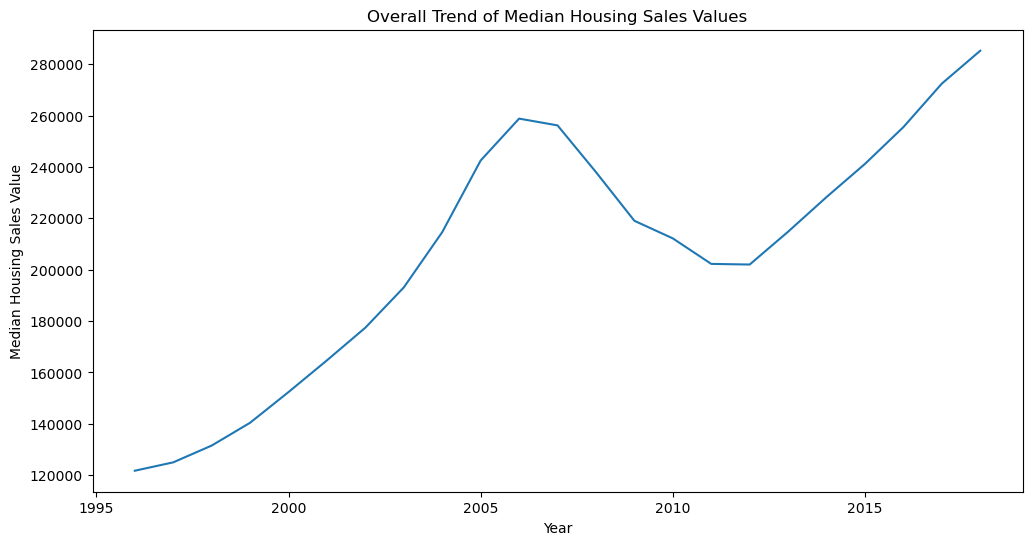

In [230]:
# Visual of overall trends

def plot_overall_trend(df, x_col, y_col, title, xlabel, ylabel, figsize=(12, 6)):
    """
    Plot the overall trend of a numerical column grouped by a datetime column (year).
    Returns:
    - None: Displays the plot.
    """
    plt.figure(figsize=figsize)
    df.groupby(x_col)[y_col].mean().plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage:
plot_overall_trend(melted_df, 'year', 'value', 
                   'Overall Trend of Median Housing Sales Values',
                   'Year', 'Median Housing Sales Value')


In [231]:
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0,April,1996
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,April,1996
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,April,1996
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0,April,1996
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300,April,2018
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800,April,2018
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400,April,2018
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400,April,2018


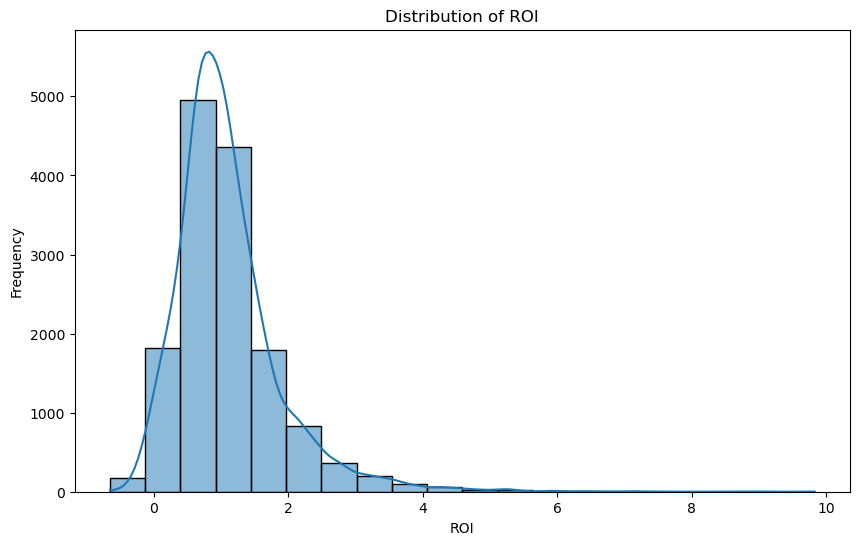

In [232]:
# Plot distributions and relationships
plt.figure(figsize=(10, 6))
sns.histplot(df['ROI'], bins=20, kde=True)
plt.title('Distribution of ROI')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.show()

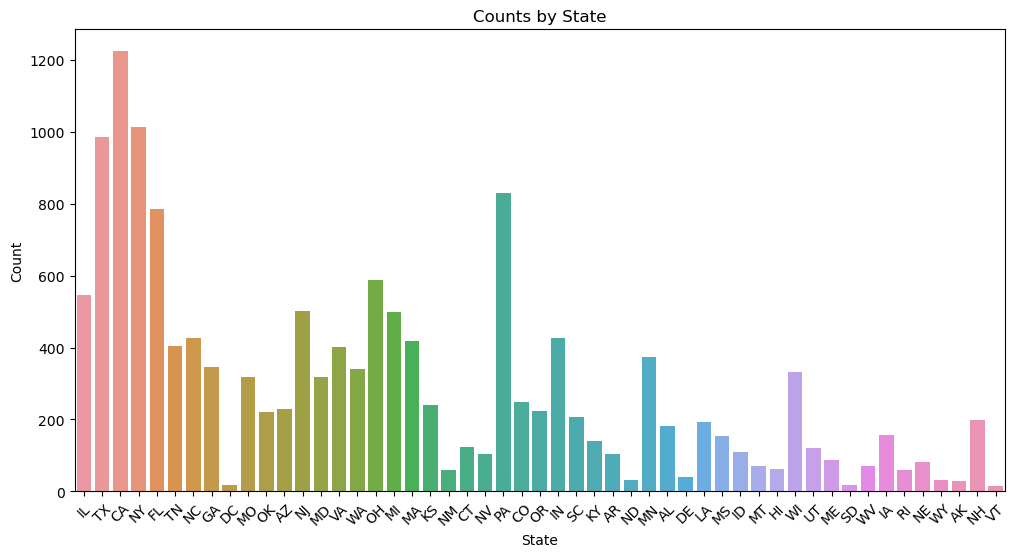

In [233]:
# Geographical analysis example (if applicable)
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df)
plt.title('Counts by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Modelling

In [234]:
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0,April,1996
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,April,1996
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,April,1996
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0,April,1996
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300,April,2018
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800,April,2018
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400,April,2018
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400,April,2018


In [235]:
# Selected columns 'value' and 'time' from the 'melted_df' DataFrame
ts = melted_df[['value', 'time']]

# Converted the 'time' column to a datetime data type
ts['time'] = pd.to_datetime(ts['time'])

# Set the 'time' column as the index of the 'ts' DataFrame
ts.set_index('time', inplace=True)
ts

,value
time,
1996-04-01,216500.0
1996-04-01,95400.0
1996-04-01,766000.0
1996-04-01,162000.0
1996-04-01,101000.0
...,...
2018-04-01,209300
2018-04-01,225800
2018-04-01,133400


In [236]:
def split_train_test(ts, split_ratio=0.7):
    """
    Split a time series dataset into training and test sets.

    Parameters:
    - ts (pd.Series or pd.DataFrame): The time series data to split.
    - split_ratio (float): Ratio to split the dataset into training and test sets (default: 0.7).

    Returns:
    - tuple: Tuple containing train_set (pd.Series or pd.DataFrame) and test_set (pd.Series or pd.DataFrame).
    """
    # Ensure the data is sorted by index
    df = ts.sort_index()

    # Calculate the index to split the dataset
    split_index = int(split_ratio * len(df))

    # Split the dataset
    train_set = df.iloc[:split_index]
    test_set = df.iloc[split_index:]

    return train_set, test_set

# Split the time series into train and test sets
train_set, test_set = split_train_test(ts)

# Print the sizes of the train and test sets
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 2729818
Test set size: 1169922


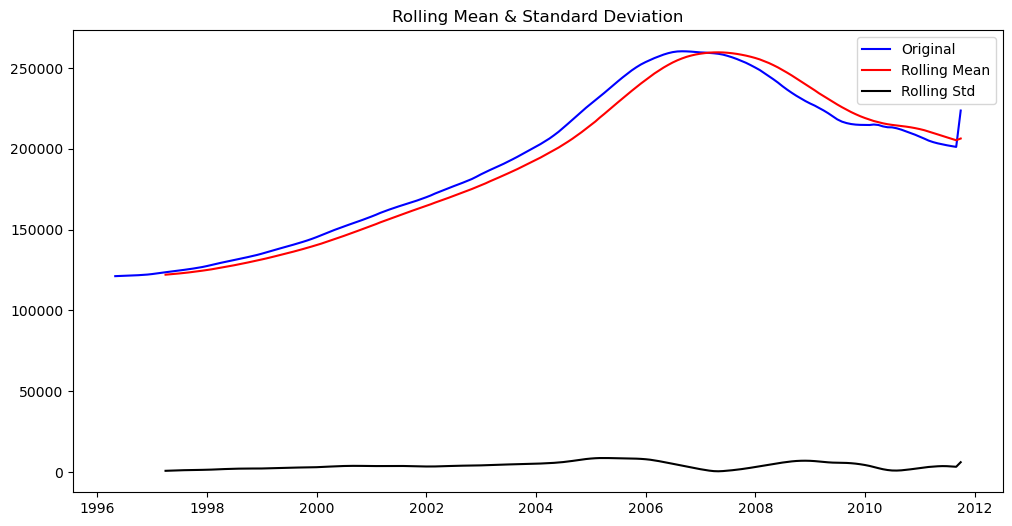

Results of Dickey-Fuller Test:
Test Statistic                  -0.276366
p-value                          0.928786
#Lags Used                       1.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


In [238]:
def resample_fillna(ts, freq='M'):
    """
    Resample a time series to the specified frequency and fill missing values with forward fill.
    
    Parameters:
    - ts (pd.Series): The time series data to resample.
    - freq (str): The frequency to resample to (default: 'M' for monthly).
    
    Returns:
    - pd.Series: Resampled time series with missing values filled using forward fill.
    """
    resampled_ts = ts.resample(freq).mean().fillna(method='ffill')
    return resampled_ts

def stationarity_check(ts):
    """
    Check the stationarity of a time series using the Dickey-Fuller test and rolling statistics.
    
    Parameters:
    - ts (pd.Series): The time series to check for stationarity.
    
    Returns:
    - None: Prints the Dickey-Fuller test results and plots the rolling mean and standard deviation.
    """
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=12).mean()  # Rolling mean with a window size of 12 months
    roll_std = ts.rolling(window=12).std()    # Rolling standard deviation with a window size of 12 months
    
    # Perform the Dickey-Fuller test to check for stationarity
    dftest = adfuller(ts)
    
    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(ts, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


# Resample and fill missing values
train_set_resampled = resample_fillna(train_set, freq='M')

# Check stationarity of resampled time series
stationarity_check(train_set_resampled)

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_and_plot(ts, freq=12):
    """
    Decompose a time series into trend, seasonality, and residuals using seasonal_decompose,
    and plot the decomposed components.
    
    Parameters:
    - ts (pd.Series): The time series data to decompose.
    - freq (int): Frequency of seasonality (default: 12 for monthly seasonality).
    
    Returns:
    - None (plots the decomposed components).
    """
    # Convert ts to numeric if it's not already
    ts = pd.to_numeric(ts, errors='coerce')
    
    # Drop any NaN values
    ts = ts.dropna()
    
    # Check if there are non-positive values
    if (ts <= 0).any():
        raise ValueError("Time series contains non-positive values, cannot take logarithm.")
    
    # Decompose the time series using seasonal_decompose
    decomposition = seasonal_decompose(np.log(ts), period=freq)
    
    # Gather the trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plot the gathered statistics
    plt.figure(figsize=(12, 8))
    
    # Original time series
    plt.subplot(411)
    plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.title('Original Time Series')
    
    # Trend component
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.title('Trend Component')
    
    # Seasonal component
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.title('Seasonal Component')
    
    # Residual component
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.title('Residual Component')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Perform decomposition and plot components
decompose_and_plot(train_set)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [242]:
ts.dtypes

value    object
dtype: object